In [260]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

%matplotlib inline

In [261]:
import plotly.graph_objs as go 
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [262]:
donations = pd.read_csv('skills_assessment_data - donation_table.csv')
donors = pd.read_csv('skills_assessment_data - donor_table.csv')
media = pd.read_csv('skills_assessment_data - media_table.csv')
donations.head()


,donation_id,donation_revenue,donor_type
0,1,74.98,one-time
1,2,68.60,one-time
2,3,44.85,recurring
3,4,39.91,one-time
4,5,111.13,one-time


In [263]:
donors.head()

,donation_id,state,age,gender,donor_type,spending_on_food,entertainment
0,1,AZ,30,F,one-time,232.56,224.23
1,2,AR,39,F,one-time,322.04,314.23
2,3,LA,24,F,recurring,197.80,165.23
3,4,MO,33,M,one-time,360.64,300.67
4,5,SD,67,M,one-time,264.75,190.67


In [264]:
media.head()

,donation_id,channel,campaign_name
0,1,organic,General
1,2,organic,General
2,3,organic,General
3,4,organic,General
4,5,email,Homelessness


In [265]:
data = donors
data['channel'], data['campaign_name'] = media['channel'], media['campaign_name']
data['donation_revenue'] = donations['donation_revenue']
data.head()

,donation_id,state,age,gender,donor_type,spending_on_food,entertainment,channel,campaign_name,donation_revenue
0,1,AZ,30,F,one-time,232.56,224.23,organic,General,74.98
1,2,AR,39,F,one-time,322.04,314.23,organic,General,68.60
2,3,LA,24,F,recurring,197.80,165.23,organic,General,44.85
3,4,MO,33,M,one-time,360.64,300.67,organic,General,39.91
4,5,SD,67,M,one-time,264.75,190.67,email,Homelessness,111.13


In [266]:
data.groupby('state').sum()

,donation_id,age,spending_on_food,entertainment,donation_revenue
state,,,,,
AR,1529571,23550,161225.58,132441.30,50868.40
AZ,801886,13388,92643.83,74293.06,29558.67
LA,1143687,17892,117063.88,96180.59,36692.44
MI,1066666,16477,112172.39,92859.39,38428.00
MO,1168741,19124,129102.78,103983.50,38147.11
ND,210507,2901,20490.39,16451.88,5534.98
NM,682406,10825,76898.73,63588.70,23206.45
OK,2006490,31657,214395.19,176270.47,70295.70
SD,423409,6944,46255.69,36923.39,14723.31


In [267]:
data['channel'].unique()

array(['organic', 'email', 'org', 'display', 'sarch', 'search', 'e-mail'],
      dtype=object)

In [268]:
data = data.replace(to_replace = {'e-mail':'email', 'sarch':'search', 'org':'organic'})

In [269]:
totals_by_state = data.groupby('state').sum().drop(columns = ['donation_id', 'age'])
means_by_state = data.groupby('state').mean().drop(columns = ['donation_id', 'age'])


In [270]:
num_donations_by_state = data.groupby('state').size()



array(['AR', 'AZ', 'LA', 'MI', 'MO', 'ND', 'NM', 'OK', 'SD', 'TX'],
      dtype=object)

In [301]:
total_rev = data.sum()['donation_revenue']
rev_by_state = data.groupby('state').sum()['donation_revenue']
pct_rev = (rev_by_state/total_rev)*100

In [306]:
map_data = dict(type = 'choropleth',
            locations = totals_by_state.index.values,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            z=pct_rev,
            colorbar = {'title':'Percent of Total Revenue'})

layout = dict(geo = {'scope':'usa'})

## Precent of Total Revenue By State

In [307]:
choromap = go.Figure(data = [map_data],layout = layout)
iplot(choromap)

In [273]:
num_general_by_state = data[data['campaign_name'] == 'General'].groupby('state').count()['age']
num_homelessness_by_state = data[data['campaign_name'] == 'Homelessness'].groupby('state').count()['age']
num_poverty_by_state = data[data['campaign_name'] == 'Poverty'].groupby('state').count()['age']

In [274]:
num_campaign_by_state = pd.DataFrame()
num_campaign_by_state['General'] = num_general_by_state
num_campaign_by_state['Homelessness'] = num_homelessness_by_state
num_campaign_by_state['Poverty'] = num_poverty_by_state


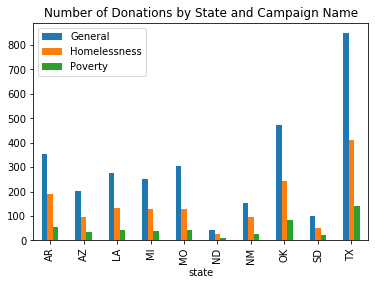

In [275]:
num_campaign_by_state.plot.bar(title = 'Number of Donations by State and Campaign Name')

In [276]:
recurring_by_state = data[data['donor_type'] == 'recurring'].groupby('state').count()['age']
total_donations_by_state = data.groupby('state').count()['age']
pct_recurring =  (recurring_by_state/total_donations_by_state)*100


In [277]:
map_data = dict(type = 'choropleth',
            locations = totals_by_state.index.values,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            z=pct_recurring,
            colorbar = {'title':'Percent of Recurring Donations'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [map_data],layout = layout)
iplot(choromap)

In [278]:
total_recurring_rev = data[data['donor_type'] == 'recurring'].groupby('state').sum()['donation_revenue']
total_rev_by_state = data.groupby('state').sum()['donation_revenue']

pct_recurring_rev_by_state = (total_recurring_rev/total_rev_by_state)*100

map_data = dict(type = 'choropleth',
            locations = totals_by_state.index.values,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            z=pct_recurring_rev_by_state,
            colorbar = {'title':'Percent Revenue from Recurring Donations'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [map_data],layout = layout)
iplot(choromap)

In [279]:
data.head()

,donation_id,state,age,gender,donor_type,spending_on_food,entertainment,channel,campaign_name,donation_revenue
0,1,AZ,30,F,one-time,232.56,224.23,organic,General,74.98
1,2,AR,39,F,one-time,322.04,314.23,organic,General,68.60
2,3,LA,24,F,recurring,197.80,165.23,organic,General,44.85
3,4,MO,33,M,one-time,360.64,300.67,organic,General,39.91
4,5,SD,67,M,one-time,264.75,190.67,email,Homelessness,111.13


In [334]:
one_time = data[data['donor_type'] == 'one-time'].groupby('state').count()['age']





state
AR     530
AZ     306
LA     402
MI     360
MO     408
ND      71
NM     234
OK     694
SD     153
TX    1242
Name: age, dtype: int64

state
AR     600
AZ     333
LA     450
MI     418
MO     475
ND      75
NM     275
OK     800
SD     174
TX    1400
Name: age, dtype: int64

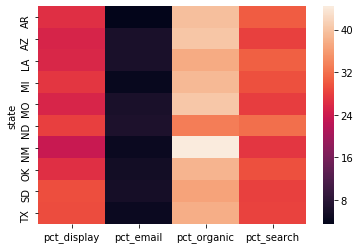

In [321]:
display_by_state = data[data['channel'] == 'display'].groupby('state').count()['age']
email_by_state = data[data['channel'] == 'email'].groupby('state').count()['age']
organic_by_state = data[data['channel'] == 'organic'].groupby('state').count()['age']
search_by_state = data[data['channel'] == 'search'].groupby('state').count()['age']
total = data.groupby('state').count()['age']

pct_display = (display_by_state/total)*100
pct_email = (email_by_state/total)*100
pct_organic = (organic_by_state/total)*100
pct_search = (search_by_state/total)*100
d = {'pct_display': pct_display, 'pct_email': pct_email, 'pct_organic':pct_organic, 'pct_search':pct_search,'total_donations': total}
channel_pcts = pd.DataFrame(data = d)
sns.heatmap(channel_pcts.drop(columns = ['total_donations']))
channel_pcts

total

In [330]:
data.head()
sums = data.groupby('state').sum()
total_spending = sums['spending_on_food'] + sums['entertainment']
pct_food = sums['spending_on_food']/total_spending
pct_ent = sums['entertainment']/total_spending
pct_ent

state
AR    0.450992
AZ    0.445037
LA    0.451034
MI    0.452902
MO    0.446116
ND    0.445340
NM    0.452629
OK    0.451205
SD    0.443902
TX    0.449226
dtype: float64

In [282]:
rec_donations = data[data['donor_type'] == 'recurring']
onetime_donations = data[data['donor_type'] == 'one-time']

total = rec_donations.count()['age']

pct_recs_by_channel = (rec_donations.groupby('channel').count()['age']/total)*100
pct_recs_by_channel

channel
display    24.2
email       5.6
organic    39.8
search     30.4
Name: age, dtype: float64

In [283]:
means = data.groupby('state').mean().drop(columns = ['donation_id'])
means_and_pct_by_channel = pd.concat([means, channel_pcts], axis = 1)

#means_and_pct_by_channel
#sns.heatmap(means_and_pct_by_channel.corr(),cmap='coolwarm')
#sns.jointplot(x = 'spending_on_food', y = 'donation_revenue', data = data, kind = 'reg')

In [284]:
recurring_by_campaign = data[data['donor_type'] == 'recurring'].groupby('campaign_name').count()['age']
total_by_campaign = data.groupby('campaign_name').count()['age']
pct_recurring_by_campaign = (recurring_by_campaign/total_by_campaign)*100
pct_recurring_by_campaign


campaign_name
General          9.900000
Homelessness    10.066667
Poverty         10.400000
Name: age, dtype: float64

In [285]:
reven_desc = data.sort_values(by = ['donation_revenue'], ascending = False)

reven_desc[reven_desc['donor_type'] == 'recurring']

,donation_id,state,age,gender,donor_type,spending_on_food,entertainment,channel,campaign_name,donation_revenue
1070,1071,TX,46,F,recurring,240.17,166.23,organic,Homelessness,101.96
1552,1553,SD,25,F,recurring,293.86,271.23,display,Homelessness,100.59
2706,2707,MO,34,M,recurring,231.55,217.67,search,Homelessness,100.43
128,129,OK,56,M,recurring,281.38,242.67,organic,Homelessness,98.53
4611,4612,MO,42,M,recurring,252.71,234.67,search,General,98.36
...,...,...,...,...,...,...,...,...,...,...
286,287,MI,42,F,recurring,409.74,120.00,display,General,4.11
917,918,OK,56,F,recurring,342.13,120.00,email,Homelessness,1.97
2784,2785,TX,30,M,recurring,359.64,298.67,display,Poverty,1.93
4481,4482,ND,42,M,recurring,395.92,335.67,email,General,1.72


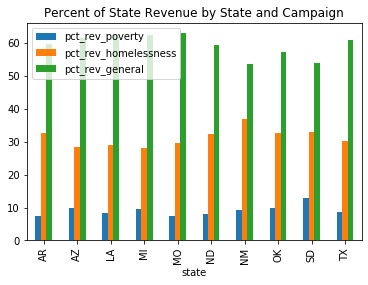

In [313]:
revenue_poverty = data[data['campaign_name'] == 'Poverty'].groupby('state').sum()['donation_revenue']
revenue_homelessness = data[data['campaign_name'] == 'Homelessness'].groupby('state').sum()['donation_revenue']
revenue_general = data[data['campaign_name'] == 'General'].groupby('state').sum()['donation_revenue']
total_rev = data.groupby('state').sum()['donation_revenue']

pct_rev_poverty = (revenue_poverty/total_rev)*100
pct_rev_homelessness = (revenue_homelessness/total_rev)*100
pct_rev_general = (revenue_general/total_rev)*100

d = {'pct_display': pct_display, 'pct_email': pct_email, 'pct_organic':pct_organic, 'pct_search':pct_search, 
     'pct_recurring': pct_recurring, 'total_donations': total}


d = {'pct_rev_poverty':pct_rev_poverty, 'pct_rev_homelessness':pct_rev_homelessness, 'pct_rev_general':pct_rev_general}

pct_revs = pd.DataFrame(data = d)
pct_revs.plot.bar(title = 'Percent of State Revenue by State and Campaign')

In [287]:
total_rev_by_campaign = data.groupby('campaign_name').sum()['donation_revenue']
total_rev = data.sum()['donation_revenue']

pct_rev_totals = (total_rev_by_campaign/total_rev)*100
pct_rev_totals


campaign_name
General         60.139386
Homelessness    30.937055
Poverty          8.923559
Name: donation_revenue, dtype: float64

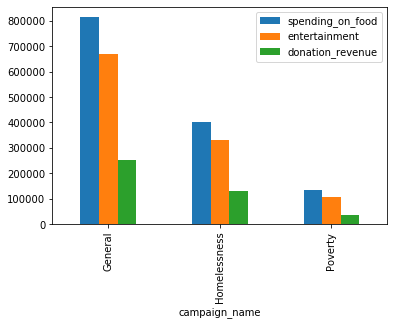

In [288]:
data.groupby('campaign_name').sum().drop(columns = ['donation_id', 'age']).plot.bar()

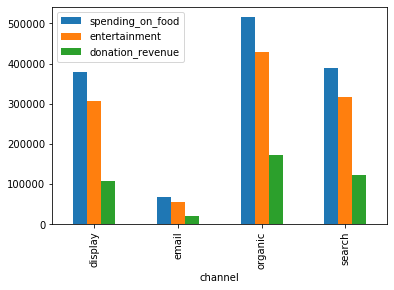

In [335]:
data.groupby('channel').sum().drop(columns = ['donation_id', 'age']).plot.bar()

In [289]:
data.groupby('campaign_name').count()['age']

campaign_name
General         3000
Homelessness    1500
Poverty          500
Name: age, dtype: int64

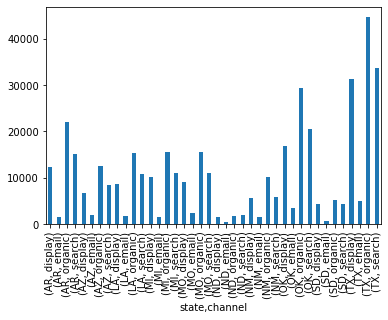

In [290]:
data.drop(columns = ['donation_id', 'age']).groupby(['state','channel']).sum()['donation_revenue'].plot.bar()

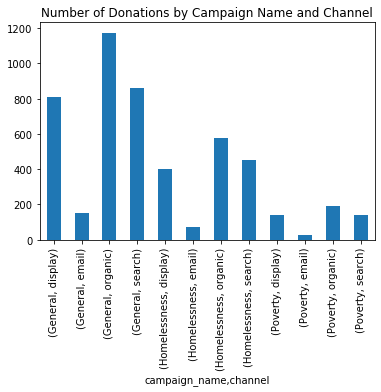

In [291]:
data.groupby(['campaign_name','channel']).count()['age'].plot.bar(title = 'Number of Donations by Campaign Name and Channel')

,num_donations,state_revenue
num_donations,1.000000,0.998056
state_revenue,0.998056,1.000000


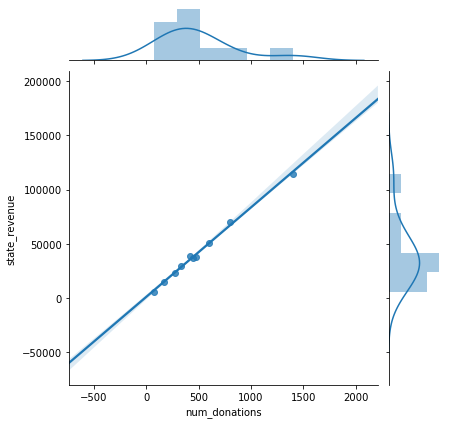

In [299]:
state_rev = data.groupby('state').sum()['donation_revenue']
num_donations = data.groupby('state').count()['donation_revenue']
d = {'num_donations': num_donations, 'state_revenue':state_rev}
df = pd.DataFrame(data = d)
sns.jointplot(data = df, x = 'num_donations', y = 'state_revenue', kind = 'reg')
df.corr()

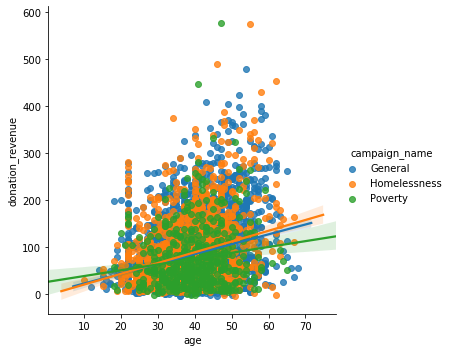

In [415]:
sns.lmplot(data = data, x = 'age', y = 'donation_revenue', hue = 'campaign_name')

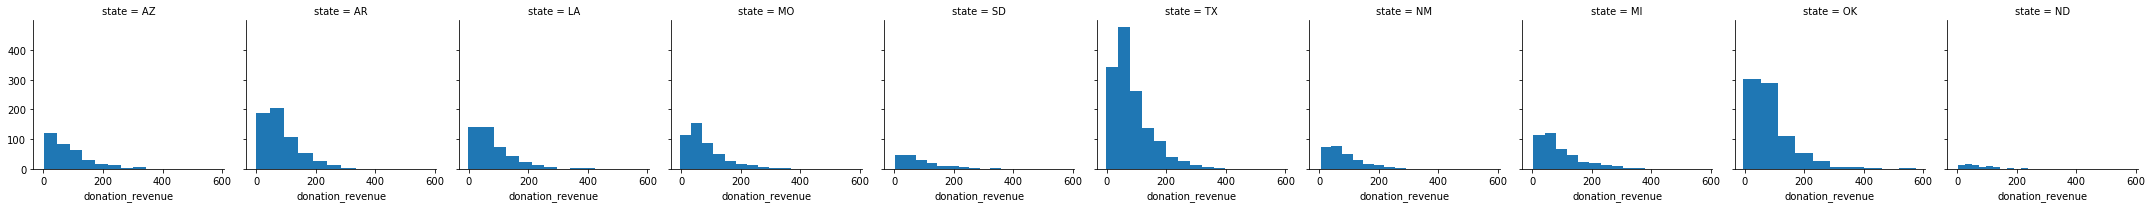

In [420]:
g = sns.FacetGrid(data, col = 'state')
g.map(plt.hist, 'donation_revenue')

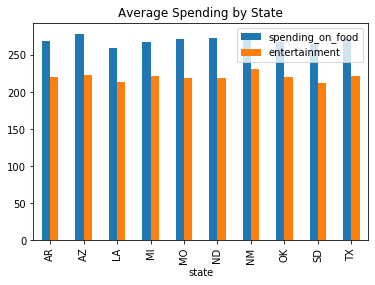

In [431]:
data.groupby('state').mean()[['spending_on_food', 'entertainment']].plot.bar(title = 'Average Spending by State')

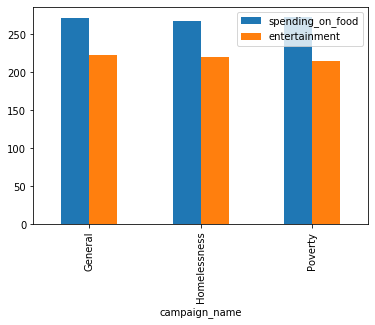

In [365]:
data.groupby('campaign_name').mean()[['spending_on_food', 'entertainment']].plot.bar()

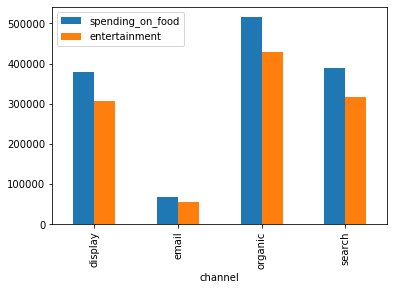

In [363]:
data.groupby('channel').sum()[['spending_on_food', 'entertainment']].plot.bar()

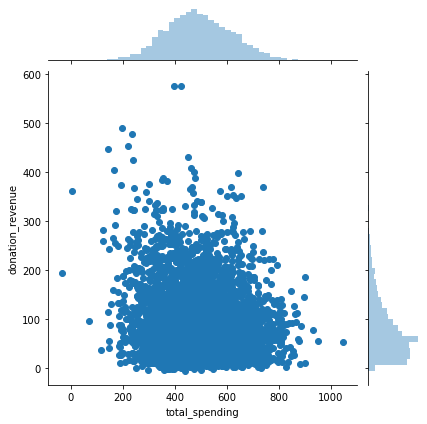

In [396]:
data['total_spending'] = data['spending_on_food'] + data['entertainment']
data['pct_rev_of_spending'] = (data['donation_revenue']/data['total_spending'])*100
sns.jointplot(data = data, x = 'total_spending', y = 'donation_revenue' )

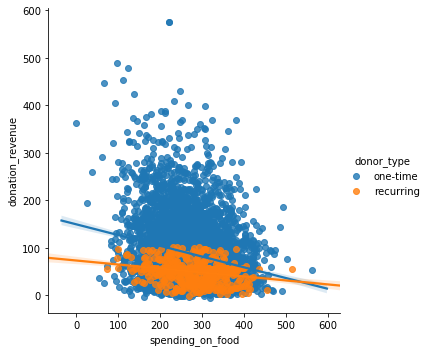

In [404]:
sns.lmplot(data = data[data.donor_type != ' '], x = 'spending_on_food', y = 'donation_revenue', hue = 'donor_type' )

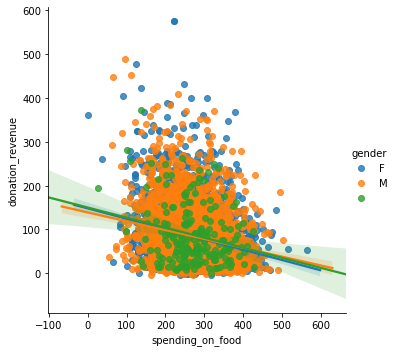

In [398]:
sns.lmplot(data = data, x = 'spending_on_food', y = 'donation_revenue', hue = 'gender' )

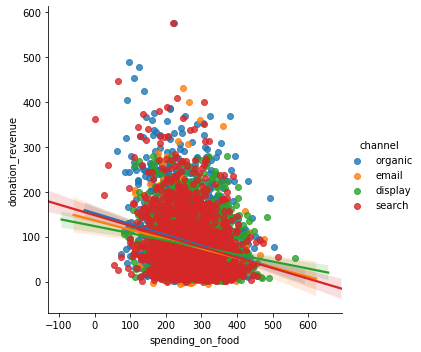

In [399]:
sns.lmplot(data = data, x = 'spending_on_food', y = 'donation_revenue', hue = 'channel' )

In [400]:
data.head()

,donation_id,state,age,gender,donor_type,spending_on_food,entertainment,channel,campaign_name,donation_revenue,total_spending,pct_rev_of_spending
0,1,AZ,30,F,one-time,232.56,224.23,organic,General,74.98,456.79,16.414545
1,2,AR,39,F,one-time,322.04,314.23,organic,General,68.60,636.27,10.781586
2,3,LA,24,F,recurring,197.80,165.23,organic,General,44.85,363.03,12.354351
3,4,MO,33,M,one-time,360.64,300.67,organic,General,39.91,661.31,6.034991
4,5,SD,67,M,one-time,264.75,190.67,email,Homelessness,111.13,455.42,24.401651


In [401]:
data.sort_values(by = ['pct_rev_of_spending'], ascending = False).mean()

donation_id            2500.500000
age                      39.515800
spending_on_food        270.451806
entertainment           220.914166
donation_revenue         84.404846
total_spending          491.365972
pct_rev_of_spending      20.734249
dtype: float64

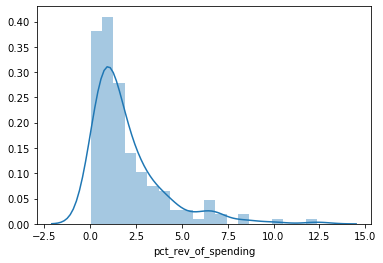

In [389]:
d = data[['pct_rev_of_spending', 'state']]
d = d[(d.pct_rev_of_spending <=500) & (d.pct_rev_of_spending >= 0) ]
d = d[d['state'] == 'SD']
sns.distplot(d['pct_rev_of_spending'])

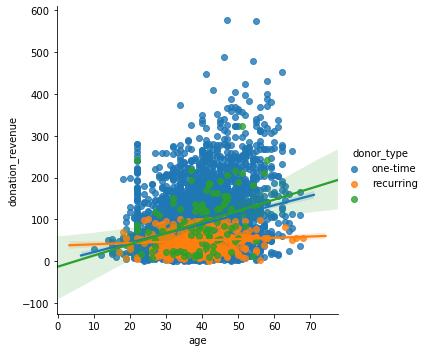

In [437]:
d = data#[['pct_rev_of_spending', 'state']]
d = d[(d.pct_rev_of_spending <=500) & (d.pct_rev_of_spending >= 0) ]
#g = sns.FacetGrid(d, col = 'state')
#g.map(plt.hist, 'pct_rev_of_spending')

sns.lmplot(data = d, x = 'age', y = 'donation_revenue', hue = 'donor_type' )

state
AR    17.321804
AZ    17.706494
LA    17.206749
MI    18.742460
MO    16.366090
ND    14.982783
NM    16.518524
OK    17.993826
SD    17.700737
TX    16.518306
dtype: float64

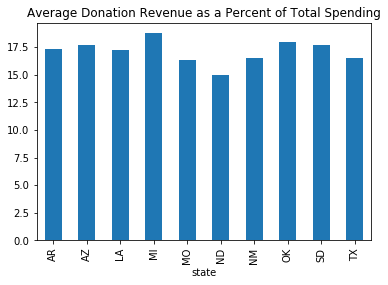

In [435]:
state_revs = data.groupby('state').mean()['donation_revenue']
state_spending = data.groupby('state').mean()['total_spending']

pct_rev_state_spending = (state_revs/state_spending)*100

sns.distplot(pct_rev_state_spending)
pct_rev_state_spending.plot.bar(title = 'Average Donation Revenue as a Percent of Total Spending')

pct_rev_state_spending